\begin{align}
-\Delta& u = f(x,y),\quad (x,y)\in\Omega\\
&u=\varphi(x,y), \quad (x,y)\in\partial\Omega
\end{align}


引入记号：
\begin{align*}
&\delta_{x}v_{i-\frac{\lambda}{2},j}=\frac{1}{h_{1}}\big(v_{i,j}-v_{i-1,j}\big),\quad\delta_{x}^{2}v_{ij}=\frac{1}{h_{1}}\big(\delta_{x}v_{i+\frac{1}{2},j}-\delta_{x}v_{i-\frac{1}{2},j}\big), \\
&\delta_{y}v_{i,j-\frac{1}{2}}=\frac{1}{h_{2}}\big(v_{i,j}-v_{i,j-1}\big),\quad\delta_{y}^{2}v_{ij}=\frac{1}{h_{2}}\big(\delta_{y}v_{i,j+\frac{1}{2}}-\delta_{y}v_{i,j-\frac{1}{2}}\big), \\
&\Delta_{h}v_{ij}=\delta_{x}^{2}v_{ij}+\delta_{y}^{2}v_{ij},\quad\|v\|_{\infty}=\max_{0\leqslant i\leqslant m_{1},0\leqslant j\leqslant m_{2}}|v_{ij}|.
\end{align*}

差分格式：
\begin{align*}
-\Delta_{h}u_{ij}&=f(x_{i},y_{j}),\quad(i,j)\in\omega,
\\u_{ij}&=\varphi(x_{i},y_{j}),\quad(i,j)\in\gamma
\end{align*}

格式可以写成：
\begin{align*}
& -\frac{1}{h_2^2} u_{i, j-1}-\frac{1}{h_1^2} u_{i-1, j}+2\left(\frac{1}{h_1^2}+\frac{1}{h_2^2}\right) u_{i j}-\frac{1}{h_1^2} u_{i+1, j}-\frac{1}{h_2^2} u_{i, j+1} \\
= & f\left(x_i, y_j\right), \quad(i, j) \in \omega .
\end{align*}
其中：
$$
u_j=(u_{1,j},u_{2,j},...,u_{m_1-1,j}),\quad 0\leq j\leq m_2
$$
迭代格式用矩阵的形式表达：
$$
Du_{j-1}+Cu_j+Du_{j+1}=f_j,\quad 1\leq j\leq m_2-1
$$

其中，
\begin{align*}
\left.C=\left(\begin{array}{rrrrr}2(\frac1{h_1^2}+\frac1{h_2^2})&-\frac1{h_1^2}&&&\\-\frac1{h_1^2}&2\left(\frac1{h_1^2}+\frac1{h_2^2}\right)&-\frac1{h_1^2}&&\\&\ddots&\ddots&\\&&-\frac1{h_1^2}&2\left(\frac1{h_1^2}+\frac1{h_2^2}\right)&-\frac1{h_1^2}\\&&&-\frac1{h_1^2}&2\left(\frac1{h_1^2}+\frac1{h_2^2}\right)\end{array}\right.\right)_{m_1-1,m_1-1}
\end{align*}

\begin{align*}
D=\begin{pmatrix}-\frac1{h_2^2}&&&&\\&-\frac1{h_2^2}&&&\\&&\ddots&&\\&&&-\frac1{h_2^2}&\\&&&&-\frac1{h_2^2}\end{pmatrix},\quad f_j=\begin{pmatrix}f(x_1,y_j)+\frac1{h_1^2}\varphi(x_0,y_j)\\f(x_2,y_j)\\\vdots\\f(x_{m_1-2},y_j)\\f(x_{m_1-1},y_j)+\frac1{h_1^2}\varphi(x_{m_1},y_j)\end{pmatrix}
\end{align*}

求解线性方程组：
\begin{align*}
\left.\left(\begin{array}{ccccc}C&D&&\\D&C&D&&\\&\ddots&\ddots&\ddots&\\&&D&C&D\\&&&D&C\end{array}\right.\right)\left(\begin{array}{c}\boldsymbol{u}_1\\\boldsymbol{u}_2\\\varvdots\\\boldsymbol{u}_{m_2-2}\\\boldsymbol{u}_{m_2-1}\end{array}\right)=\left(\begin{array}{c}\boldsymbol{f}_1-D\boldsymbol{u}_0\\\boldsymbol{f}_2\\\vdots\\\boldsymbol{f}_{m_2-2}\\\boldsymbol{f}_{m_2-1}-D\boldsymbol{u}_{m_2}\end{array}\right)
\end{align*}

可以用Jacobi迭代的方法算：
$$
u_{i,j}^{k+1} = [f(x_i,y_j)+\frac{1}{h_2^2}u_{i,j-1}^k+\frac{1}{h_1^2}u_{i-1,j}^k+\frac{1}{h_1^2}u_{i+1,j}^k+\frac{1}{h_2^2}u_{i,j+1}^k]/[2(\frac{1}{h_1^2}+\frac{1}{h_2^2})],\quad i=1,2,....m_1-1;\quad j=1,2,...,m_2-1
$$

例子：
\begin{align}
&-\Delta u=(\pi^2-1)\mathrm{e}^x\sin(\pi y),\quad0<x<2,\quad0<y<1, \\
&u(0,y)=\sin(\boldsymbol{\pi}y),\quad u(2,y)=\mathrm{e}^2\sin(\boldsymbol{\pi}y),\quad0\leqslant y\leqslant1, \\
&u\left(x,0\right)=0,\quad u\left(x,1\right)=0,0<x<2.
\end{align}

In [6]:
import numpy as np
import scipy.sparse
import copy

In [7]:
Nx = 101
Ny = 101
x_max = 2
x_min = 0
y_max = 1
y_min = 0
x = np.linspace(x_min,x_max,Nx)
y = np.linspace(y_min,y_max,Ny)
hx = (x_max - x_min)/(Nx-1)
hy = (y_max - y_min)/(Ny-1)

In [8]:
c = np.ones(((Nx-2)*(Ny-2),))*2*(1/hx**2+1/hy**2)
c1 = np.ones(((Nx-2)*(Ny-2),))*-(1/hx**2)
d = np.ones(((Nx-2)*(Ny-2),))*-(1/hy**2)

f = lambda x,y: ((np.pi)**2-1)*np.e**x*np.sin(np.pi*y)
u0 = lambda y: np.sin(np.pi*y)
ul = lambda y: np.e**2*np.sin(np.pi*y)

analysis = lambda x,y: np.e**(x)*np.sin(np.pi*y)

In [9]:
k = 0
u_last = 0.5*np.ones((Nx,Ny))
u_new = np.ones((Nx,Ny))
u_new[0][:] = u0(y)
u_new[-1][:] = ul(y)
for i in range(Nx):
    u_new[i][0] = 0
    u_new[i][-1] = 0
while(np.max(u_new-u_last)>10**(-1)):
    u_last = copy.deepcopy(u_new)  
    for i in range(1,Nx-1):
        for j in range(1,Ny-1):
            u_new[i][j] = (f(x[i],y[j])+1/hy**2*u_last[i][j-1]+1/hx**2*u_last[i-1][j]+1/hx**2*u_last[i+1][j]+1/hy**2*u_last[i][j+1])/(2*(1/hx**2+1/hy**2))
    k += 1
    if k%10 == 0:
        print(np.max(u_new-u_last))
print(np.max(u_new-u_last))

0.14009621638439596
0.09958796657043756


Text(0.5, 0.5, 'y')

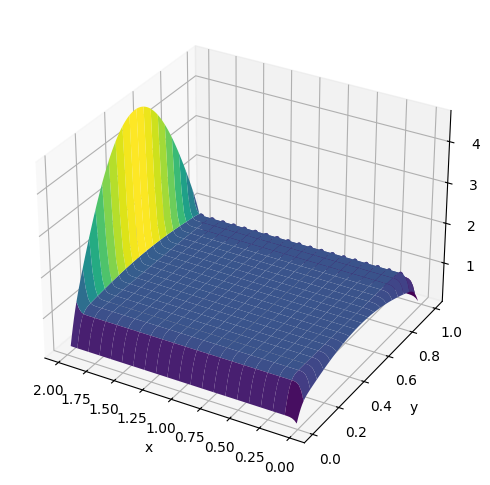

In [10]:
import matplotlib.pyplot as plt
fig1 = plt.figure(figsize=(8, 6), dpi=100)
ax = fig1.add_subplot(111, projection='3d')
X,Y = np.meshgrid(x[1:-1], y[1:-1])
ax.invert_xaxis()
surface = ax.plot_surface(X, Y, u_new[1:-1, 1:-1].T, cmap='viridis', rstride=5, cstride=5, alpha=1, antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
#这里要用u_new.T，因为原本的u_new[0]这个表示在x=0时，u(0,y)的值，但是这个结果画在X,Y = np.meshgrid(x, y)的面向我们的第一列，也就是下图中y=0，x=(0,2)上面。
#但我们要在y=0，x=(0,2)上面画的是 u(x,0)的数值，这个也就是对应了u_new中的第一列，所以这里就需要做一个转置

In [11]:
c = np.ones(((Nx-2)*(Ny-2),))*2*(1/hx**2+1/hy**2)
c1 = np.ones(((Nx-2)*(Ny-2),))*-(1/hx**2)
d = np.ones(((Nx-2)*(Ny-2),))*-(1/hy**2)

f = lambda x,y: ((np.pi)**2-1)*np.e**x*np.sin(np.pi*y)
u0 = lambda y: np.sin(np.pi*y)
ul = lambda y: np.e**2*np.sin(np.pi*y)

In [12]:
C =  scipy.sparse.spdiags(c,  0, Nx-2, Nx-2)\
    +scipy.sparse.spdiags(c1, 1, Nx-2, Nx-2)\
    +scipy.sparse.spdiags(c1,-1, Nx-2, Nx-2)
CC = scipy.sparse.block_diag([C]*(Ny-2))
D =  scipy.sparse.spdiags(d, Nx-2, (Nx-2)*(Ny-2), (Nx-2)*(Ny-2))\
    +scipy.sparse.spdiags(d, -(Nx-2), (Nx-2)*(Ny-2), (Nx-2)*(Ny-2))
A = CC+D

In [13]:
def F(y):
    F = f(x[1:-1],y)
    F[0] += (1/hx**2)*u0(y)
    F[-1] += (1/hx**2)*ul(y)
    return F
FF = []
for i in range(1,Ny-1):
    FF.append(F(y[i]))
FF = np.reshape(FF, (Nx-2)*(Ny-2))

In [14]:
A = scipy.sparse.csc_matrix(A)
result = scipy.sparse.linalg.spsolve(A,FF)
result = np.reshape(result, (Ny-2,Nx-2))
result = result.T

Text(0.5, 0.5, 'y')

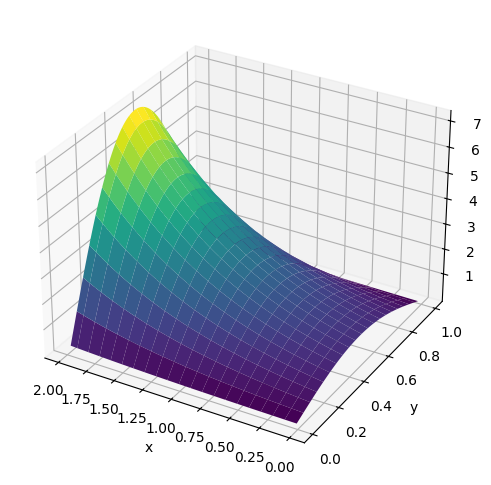

In [21]:
fig2 = plt.figure(figsize=(8, 6), dpi=100)
ax2 = fig2.add_subplot(111, projection='3d')
X,Y = np.meshgrid(x[1:-1], y[1:-1])
ax2.invert_xaxis()
ax.view_init(90, 90)
surface = ax2.plot_surface(X, Y, result.T, cmap='viridis', rstride=5, cstride=5, alpha=1, antialiased=True)
ax2.set_xlabel('x')
ax2.set_ylabel('y')

In [16]:
results = [analysis(x[i], y[j]) for i in range(1, Nx-1) for j in range(1, Ny-1)]
results = np.reshape(results, (Nx-2, Ny-2))

In [17]:
np.max(results - result)

-2.3749341077766717e-07

In [18]:
np.max(results - u_new[1:-1, 1:-1])

5.619283969382367